In [1]:
%reload_ext cpp2py.magic
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
%%cpp2py -C pytriqs
#include <triqs/statistics/stat.hpp>
#include <triqs/arrays.hpp>
#include <boost/random/variate_generator.hpp>
#include <boost/random/mersenne_twister.hpp>
#include <boost/random/normal_distribution.hpp>

triqs::arrays::array<double,1> f(int N, int seed) {
  int n_bins = 20;
  triqs::stat::auto_corr_bin_analyzer<double> AA(n_bins);

  // the number series  
  double correlation_length = 50;
  boost::variate_generator<boost::mt19937, boost::normal_distribution<>> generator((boost::mt19937(seed)), (boost::normal_distribution<>()));
  double f = exp(-1. / correlation_length);

  // produce the number and fill AA
  double B = generator();
  AA << B;  
  for (size_t i = 1; i < N; i++) {
    B = f * B + sqrt(1 - f * f) * generator();
    AA << B;
  }    
 
  // estimates of tau in an array
  triqs::arrays::array<double, 1> R(n_bins);
  for (auto [n,tau] : triqs::utility::enumerate(AA.tau_estimates())) R(n) = tau;
  return R;
}

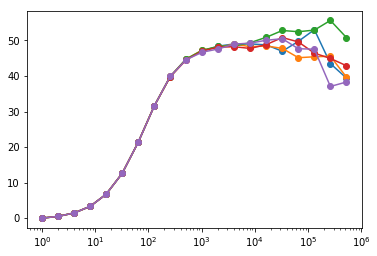

In [9]:
for seed in [1567, 345, 3521, 12312, 532532] :
    R = f(1<<25, seed)
    plt.semilogx([1 << n for n in range(R.shape[0])], R, '-o')
